In [1]:
import networkx as nx

### Graph Creation

In [2]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [3]:
G

In [4]:
G.nodes()

[1, 2, 3]

In [5]:
G.edges()

[(1, 2), (1, 3), (2, 3)]

In [6]:
G[1] # same as G.adj[1]

{2: {}, 3: {}}

In [7]:
G[1][2]

{}

In [9]:
G.edges([1, 2])

[(1, 2), (1, 3), (2, 3)]

### Graph Visualization

/Users/atakanokan/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/atakanokan/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/atakanokan/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/atakanokan/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

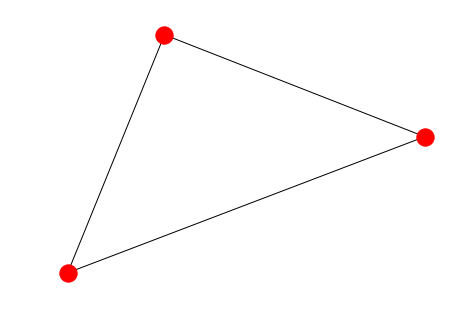

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [11]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



In [16]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
    B.add_edge(0,i)
    n=B.get_node(i)
    n.attr['fillcolor']="#%2x0000"%(i*16)
    n.attr['height']="%s"%(i/16.0+0.5)
    n.attr['width']="%s"%(i/16.0+0.5)

B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

![title](star.png)